**Some control code**

In [2]:
#pip install control

In [1]:
# control.tf([1],[1,2])

## A quick tutorial into ODE integration

$$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = 0$$

$$y=x - x^3/3$$

$$\frac{dx}{dt} = \mu(x-1/3x^3-y)$$

$$\frac{dy}{dt} = \mu/x$$

$$\mu=1$$

In [3]:
from scipy.integrate import odeint
import numpy as np

In [4]:
mu = 1.0

In [5]:
def vanderpol(X, t):
    x = X[0]
    y = X[1]
    dxdt = mu * (x - 1./3.*x**3 - y)
    dydt = x / mu
    return [dxdt, dydt]

In [6]:
X0 = [1, 2]
t = np.linspace(0, 40, 250)

In [7]:
sol = odeint(vanderpol, X0, t)

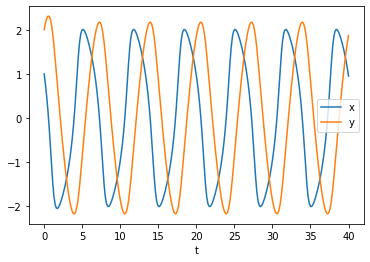

In [8]:
import matplotlib.pyplot as plt
x = sol[:, 0]
y = sol[:, 1]

plt.plot(t,x, t, y)
plt.xlabel('t')
plt.legend(('x', 'y'))
#plt.savefig('images/vanderpol-1.png')

Text(0, 0.5, 'y')

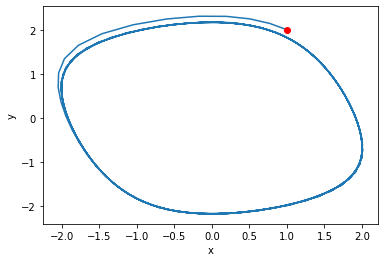

In [9]:
plt.figure()
plt.plot(x,y)
plt.plot(x[0], y[0], 'ro')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('images/vanderpol-2.png')

**The above is adapted from: https://kitchingroup.cheme.cmu.edu/blog/2013/02/02/Solving-a-second-order-ode/**

$$\frac{d^2y}{dt^2} + (a1+a4)\times\frac{dy}{dt} + a1a4y = a2a3m$$

$$m=1$$ <br> $$a1,a2,a3,a4 = 1$$

In [16]:
m = 1
a1,a2,a3,a4 = 1,1,1,1

In [17]:
def func(X,t):
  x = X[0]
  y = X[1]
  dxdt = -(a1*x) +(a2*m)
  dydt = (a3*x) - (a4*y)
  return [dxdt,dydt]





In [18]:
X0 = [1,1]
t = np.linspace(0,10,101)

In [19]:
sol = odeint(vanderpol, X0, t)

In [20]:
sol

array([[ 1.        ,  1.        ],
       [ 0.96168095,  1.09816707],
       [ 0.91340862,  1.19200458],
       [ 0.85510603,  1.28051462],
       [ 0.78653302,  1.36268364],
       [ 0.70726183,  1.43746485],
       [ 0.6166619 ,  1.50375862],
       [ 0.51389759,  1.56039196],
       [ 0.39794928,  1.60609882],
       [ 0.26767635,  1.63950434],
       [ 0.12195207,  1.65911878],
       [-0.04008661,  1.66335022],
       [-0.21862655,  1.65055003],
       [-0.41257745,  1.61910898],
       [-0.61884118,  1.5676211 ],
       [-0.83168027,  1.49511837],
       [-1.04261809,  1.4013462 ],
       [-1.24133517,  1.28700216],
       [-1.41762411,  1.15382959],
       [-1.56371327,  1.00448866],
       [-1.6758241 ,  0.84222427],
       [-1.7542606 ,  0.67044966],
       [-1.80228163,  0.49238753],
       [-1.82457046,  0.31085118],
       [-1.82598332,  0.12816862],
       [-1.81082012, -0.05379392],
       [-1.7825416 , -0.23355919],
       [-1.7437571 , -0.40995287],
       [-1.69633349,

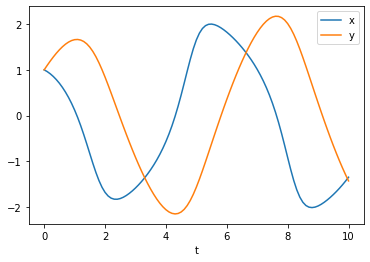

In [21]:
x = sol[:, 0]
y = sol[:, 1]

plt.plot(t,x, t, y)
plt.xlabel('t')
plt.legend(('x', 'y'))

**What we did actually is the following**

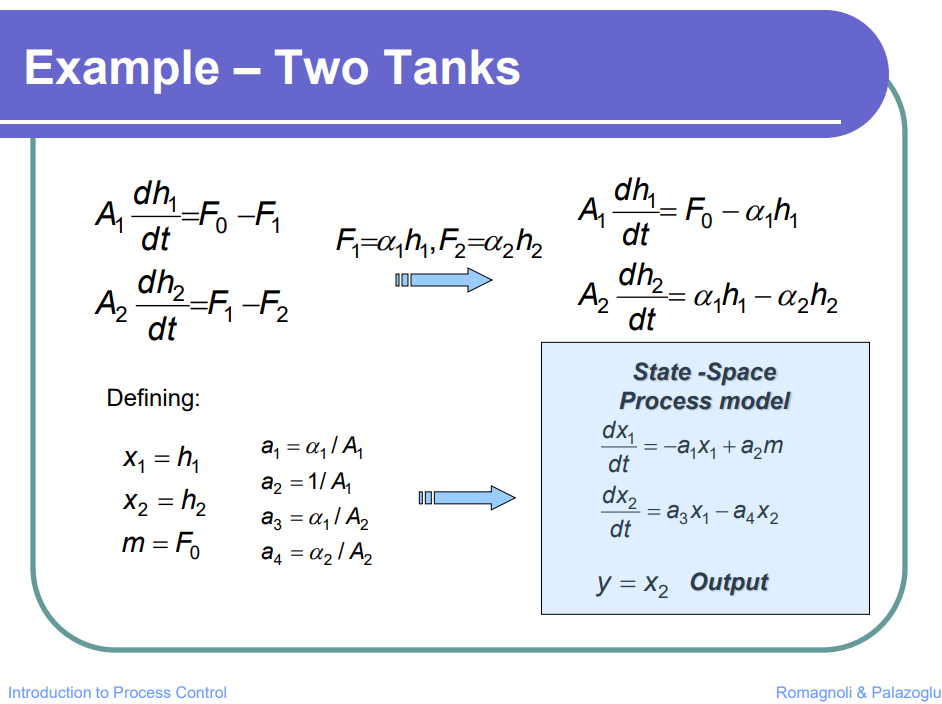

**So, what we did? we modeled two tanks connecting to each other in series configuration. Also, $\alpha$ is just a friction factor, that accounts for resistance in the oulet flow.**

In [22]:
# F0 = m = initial flow rate, entering the first tank
# x is the height or level in first tank
# y is the level in the second tank
# our output is the y or h2 
# our manipulated variable (input) is m or F0 (can be function of time)